Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,630,853 (21.48 MB)

 Trainable params: 5,630,853 (21.48 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.1579 - loss: 1.6112 - val_accuracy: 0.0000e+00 - val_loss: 3.3212
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3158 - loss: 1.5137 - val_accuracy: 0.2000 - val_loss: 2.6787
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.4211 - loss: 1.5785 - val_accuracy: 0.0000e+00 - val_loss: 2.1300
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.2632 - loss: 1.4488 - val_accuracy: 0.0000e+00 - val_loss: 2.2459
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.3158 - loss: 1.4255 - val_accuracy: 0.0000e+00 - val_loss: 2.4826
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.4211 - loss: 1.3719 - val_accuracy: 0.2000 - val_loss: 2.7227
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6316 - loss: 1.3172 - val_accuracy: 0.2000 - val_loss: 2.9690
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.4737 - loss: 1.2242 - val_accuracy: 0.2000 - v

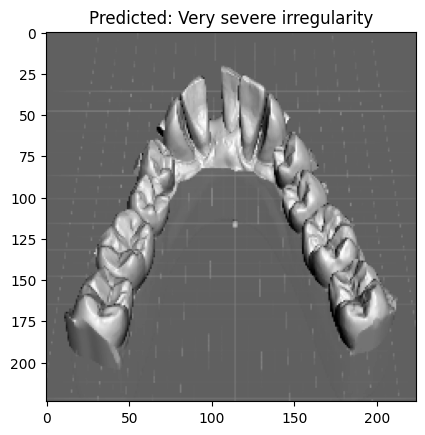

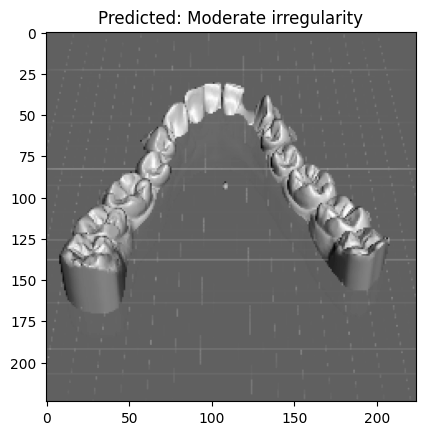

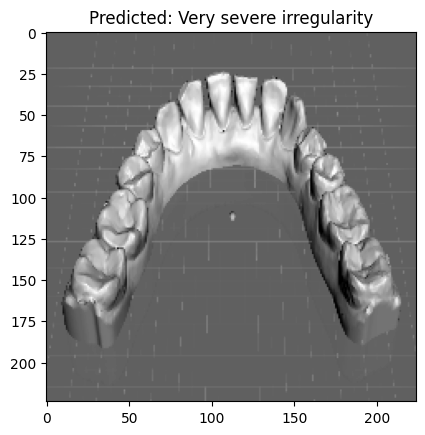

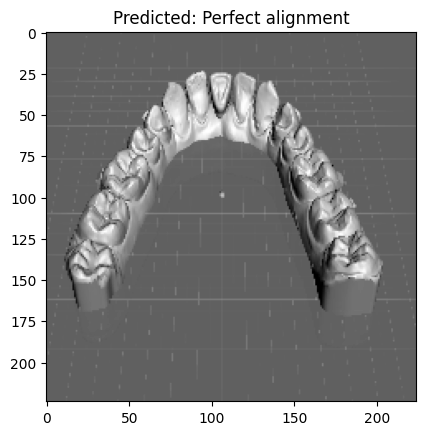

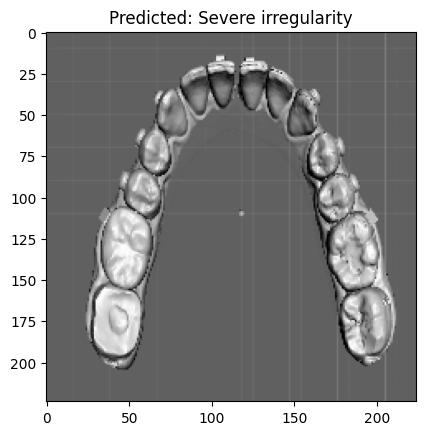

In [ ]:
# Install required libraries
!pip install tensorflow opencv-python-headless matplotlib scikit-learn

# Import necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load and preprocess images
def load_images_for_multiclass(folder, image_size=(224, 224)):
    images = []
    labels = []
    class_mapping = {
        "perfect": 0,
        "minimal": 1,
        "moderate": 2,
        "severe": 3,
        "very_severe": 4
    }

    for label_name, label in class_mapping.items():
        subfolder_path = os.path.join(folder, label_name)
        for filename in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, image_size)
                images.append(img)
                labels.append(label)

    return np.array(images), np.array(labels)

# Example usage:
image_folder = '/content/drive/MyDrive/DENTAL_PROJECT'  # Update this to the actual folder path in Google Drive
X, y = load_images_for_multiclass(image_folder)

# Normalize images
X = X / 255.0
X = np.expand_dims(X, axis=-1)  # Add channel dimension for grayscale images

# Convert labels to one-hot encoding
y = to_categorical(y, num_classes=5)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model
def build_multiclass_cnn(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(5, activation='softmax'))  # 5 classes for severity levels
    return model

# Initialize and compile the model
input_shape = (224, 224, 1)  # Grayscale images
model = build_multiclass_cnn(input_shape)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the CNN model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

# Make predictions on test data
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Reverse map the predicted labels to class names
class_mapping_reverse = {
    0: "Perfect alignment",
    1: "Minimal irregularity",
    2: "Moderate irregularity",
    3: "Severe irregularity",
    4: "Very severe irregularity"
}

predicted_labels = [class_mapping_reverse[pred] for pred in predicted_classes]
print(predicted_labels)

# Plot a few test images with their predicted labels
for i in range(5):  # Adjust the range as needed
    plt.imshow(np.squeeze(X_test[i]), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.show()

# Save the trained model
model.save('/content/drive/MyDrive/dental_irregularity_cnn_final.h5')  # Save model to Google Drive


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
Predicted Irregularity: Severe irregularity


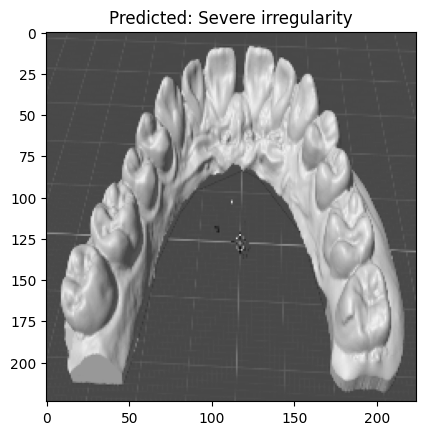

In [ ]:
# Function to preprocess a custom image
def preprocess_image(img_path, image_size=(224, 224)):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
    img = cv2.resize(img, image_size)  # Resize to 224x224
    img = img / 255.0  # Normalize the image (scale pixel values to [0, 1])
    img = np.expand_dims(img, axis=-1)  # Add channel dimension (for grayscale)
    img = np.expand_dims(img, axis=0)  # Add batch dimension (1, 224, 224, 1)
    return img

# Import load_model
from tensorflow.keras.models import load_model # Import the load_model function

# Load the saved model for testing
model = load_model('/content/drive/MyDrive/dental_irregularity_cnn_final.h5')

# Path to your custom image (Replace with your image path)
custom_image_path = '/content/drive/MyDrive/test3.png'

# Preprocess the custom image
custom_image = preprocess_image(custom_image_path)

# Make a prediction
prediction = model.predict(custom_image)

# Convert the prediction to a class label
predicted_class = np.argmax(prediction, axis=1)[0]

# Reverse map the predicted class to the corresponding label
class_mapping_reverse = {
    0: "Perfect alignment",
    1: "Minimal irregularity",
    2: "Moderate irregularity",
    3: "Severe irregularity",
    4: "Very severe irregularity"
}

predicted_label = class_mapping_reverse[predicted_class]
print(f"Predicted Irregularity: {predicted_label}")

# Visualize the custom image along with the predicted label
plt.imshow(np.squeeze(custom_image), cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.show()